# Lab 6 Tasks

### Task 1
Use Python to download a file containing data relating to Nobel Prize winners in JSON format from the URL below, and store it in a DataFrame: 

http://mlg.ucd.ie/modules/COMP30760/nobel.json

In [2]:
import pandas as pd
import requests
import json
url = "http://mlg.ucd.ie/modules/COMP30760/nobel.json" 
response = requests.get(url)
with open("noble.json", "wb") as f:
    f.write(response.content)

response.json()

{'born': {'0001': '1845-03-27',
  '0002': '1853-07-18',
  '0003': '1865-05-25',
  '0004': '1852-12-15',
  '0005': '1859-05-15',
  '0006': '1867-11-07',
  '0007': '1867-11-07',
  '0008': '1842-11-12',
  '0009': '1862-06-07',
  '0010': '1856-12-18',
  '0011': '1852-12-19',
  '0012': '1845-08-16',
  '0013': '1874-04-25',
  '0014': '1850-06-06',
  '0015': '1837-11-23',
  '0016': '1864-01-13',
  '0017': '1869-11-30',
  '0018': '1853-09-21',
  '0019': '1879-10-09',
  '0020': '1862-07-02',
  '0021': '1890-03-31',
  '0022': '1877-06-07',
  '0023': '1858-04-23',
  '0024': '1874-04-15',
  '0025': '1861-02-15',
  '0026': '1879-03-14',
  '0027': '1885-10-07',
  '0028': '1868-03-22',
  '0029': '1886-12-03',
  '0030': '1882-08-26',
  '0031': '1887-07-22',
  '0032': '1870-09-30',
  '0033': '1892-09-10',
  '0034': '1869-02-14',
  '0035': '1879-04-26',
  '0036': '1892-08-15',
  '0037': '1888-11-07',
  '0038': '1901-12-05',
  '0039': '1887-08-12',
  '0040': '1902-08-08',
  '0041': '1891-10-20',
  '0042'

In [5]:
df = pd.read_json("noble.json")
df

,born,country,died,firstname,gender,prize_category,prize_year,surname
1,1845-03-27,DE,1923-02-10,Wilhelm Conrad,male,physics,1901,Röntgen
2,1853-07-18,NL,1928-02-04,Hendrik Antoon,male,physics,1902,Lorentz
3,1865-05-25,NL,1943-10-09,Pieter,male,physics,1902,Zeeman
4,1852-12-15,FR,1908-08-25,Antoine Henri,male,physics,1903,Becquerel
5,1859-05-15,FR,1906-04-19,Pierre,male,physics,1903,Curie
...,...,...,...,...,...,...,...,...
931,1951-04-14,GB,0000-00-00,Sir Gregory P.,male,chemistry,2018,Winter
932,0000-00-00,None,0000-00-00,Denis,male,peace,2018,Mukwege
933,0000-00-00,None,0000-00-00,Nadia,female,peace,2018,Murad
934,0000-00-00,US,0000-00-00,William D.,male,economics,2018,Nordhaus


### Task 2
Produce suitable visualisations from the data to display:
- The number of prize winners in each prize category
- The number of prize winners of each country code

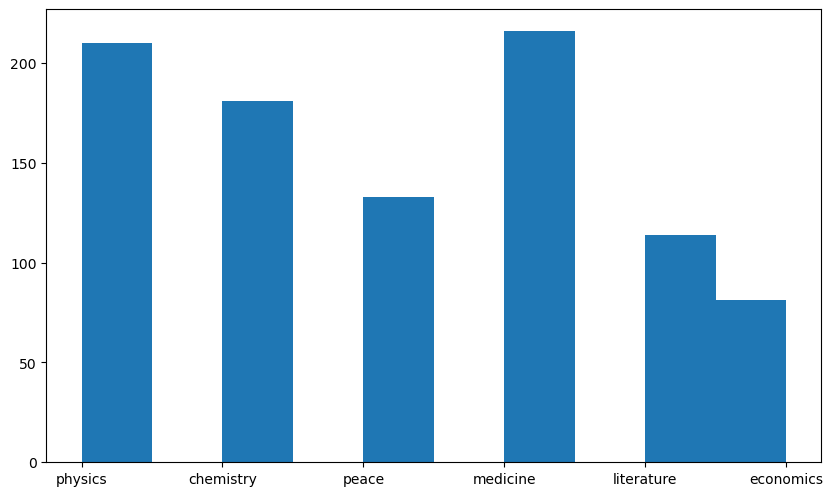

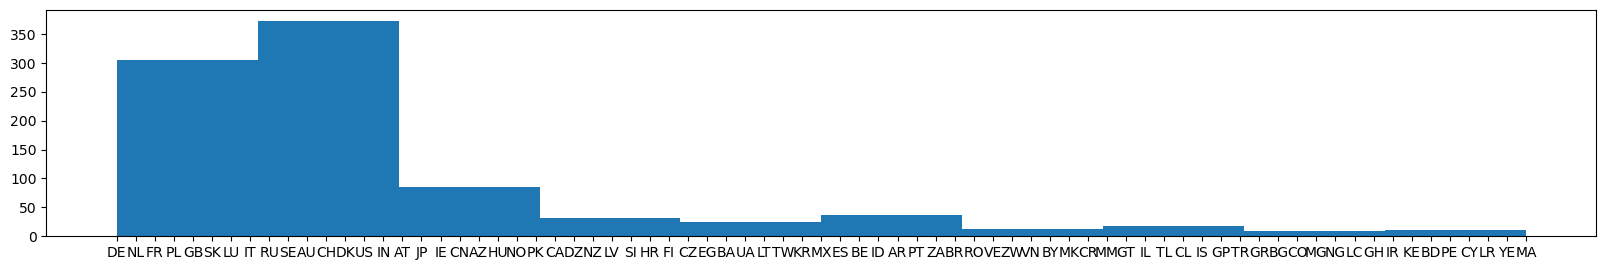

In [52]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
%matplotlib inline
import seaborn as sns

y = np.array(df["prize_category"])
figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.hist(y);

plt.show()

z = np.array(df["country"])
x=z[z != np.array(None)]
figure(num=None, figsize=(20, 3), dpi=100, facecolor='w', edgecolor='k')
plt.hist(x);

plt.show()

### Task 3
Create a new SQLite database with a single table to store the Nobel Prize winner data, **from 1950 onwards**. 

Apply a number of SELECT statements to the table to check that the data has been stored correctly.

In [43]:
import sqlite3
conn = sqlite3.connect("noblewinners.db")
c = conn.cursor()

In [44]:
df.to_sql( "Noble", conn )
conn.commit()

In [45]:
sql = "SELECT * FROM Noble"
c.execute(sql)
for row in c.fetchall():
    print(row)

(1, '1845-03-27', 'DE', '1923-02-10', 'Wilhelm Conrad', 'male', 'physics', 1901, 'Röntgen')
(2, '1853-07-18', 'NL', '1928-02-04', 'Hendrik Antoon', 'male', 'physics', 1902, 'Lorentz')
(3, '1865-05-25', 'NL', '1943-10-09', 'Pieter', 'male', 'physics', 1902, 'Zeeman')
(4, '1852-12-15', 'FR', '1908-08-25', 'Antoine Henri', 'male', 'physics', 1903, 'Becquerel')
(5, '1859-05-15', 'FR', '1906-04-19', 'Pierre', 'male', 'physics', 1903, 'Curie')
(6, '1867-11-07', 'PL', '1934-07-04', 'Marie', 'female', 'physics', 1903, 'Curie, née Sklodowska')
(7, '1867-11-07', 'PL', '1934-07-04', 'Marie', 'female', 'chemistry', 1911, 'Curie, née Sklodowska')
(8, '1842-11-12', 'GB', '1919-06-30', 'Lord Rayleigh', 'male', 'physics', 1904, '(John William Strutt)')
(9, '1862-06-07', 'SK', '1947-05-20', 'Philipp Eduard Anton', 'male', 'physics', 1905, 'von Lenard')
(10, '1856-12-18', 'GB', '1940-08-30', 'Joseph John', 'male', 'physics', 1906, 'Thomson')
(11, '1852-12-19', 'PL', '1931-05-09', 'Albert Abraham', 'male

(905, '1944-10-21', 'FR', '0000-00-00', 'Jean-Pierre', 'male', 'chemistry', 2016, 'Sauvage')
(906, '1942-05-24', 'GB', '0000-00-00', 'Sir J. Fraser', 'male', 'chemistry', 2016, 'Stoddart')
(907, '1951-05-18', 'NL', '0000-00-00', 'Bernard L.', 'male', 'chemistry', 2016, 'Feringa')
(908, '1951-08-10', 'CO', '0000-00-00', 'Juan Manuel', 'male', 'peace', 2016, 'Santos')
(909, '1948-10-09', 'GB', '0000-00-00', 'Oliver', 'male', 'economics', 2016, 'Hart')
(910, '1949-04-18', 'FI', '0000-00-00', 'Bengt', 'male', 'economics', 2016, 'Holmström')
(911, '1941-05-24', 'US', '0000-00-00', 'Bob', 'male', 'literature', 2016, 'Dylan')
(912, '1945-05-03', 'US', '0000-00-00', 'Jeffrey C.', 'male', 'medicine', 2017, 'Hall')
(913, '1944-03-07', 'US', '0000-00-00', 'Michael', 'male', 'medicine', 2017, 'Rosbash')
(914, '1949-03-28', 'US', '0000-00-00', 'Michael W.', 'male', 'medicine', 2017, 'Young')
(915, '1932-09-29', 'DE', '0000-00-00', 'Rainer', 'male', 'physics', 2017, 'Weiss')
(916, '1936-01-27', 'US'